In [1]:
# Test migration history reconstruction on simulated data

import sys
import os

REPO_DIR = os.path.join(os.getcwd(), "../../")
os.chdir(REPO_DIR)
from metient.metient import *
import metient.lib.vertex_labeling as vert
import metient.util.vertex_labeling_util as vutil

import matplotlib
import torch
MACHINA_DATA_DIR = os.path.join(REPO_DIR, 'metient/data/machina_sims')
OUT_DIR = os.path.join(REPO_DIR, "metient/test/output_plots")

/lila/home/koyyald/mambaforge/envs/met/lib/python3.8/site-packages/torch/cuda/__init__.py:138: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11030). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


CUDA GPU: False


In [2]:
import pydot
from IPython.display import Image, display

def visualize_ground_truth(tree_fn, graph_fn):
    def view_pydot(pdot):
        plt = Image(pdot.create_png())
        display(plt)
    
    (graph,) = pydot.graph_from_dot_file(tree_fn)
    view_pydot(graph)

    (graph,) = pydot.graph_from_dot_file(graph_fn)
    view_pydot(graph)
        

Ground truth


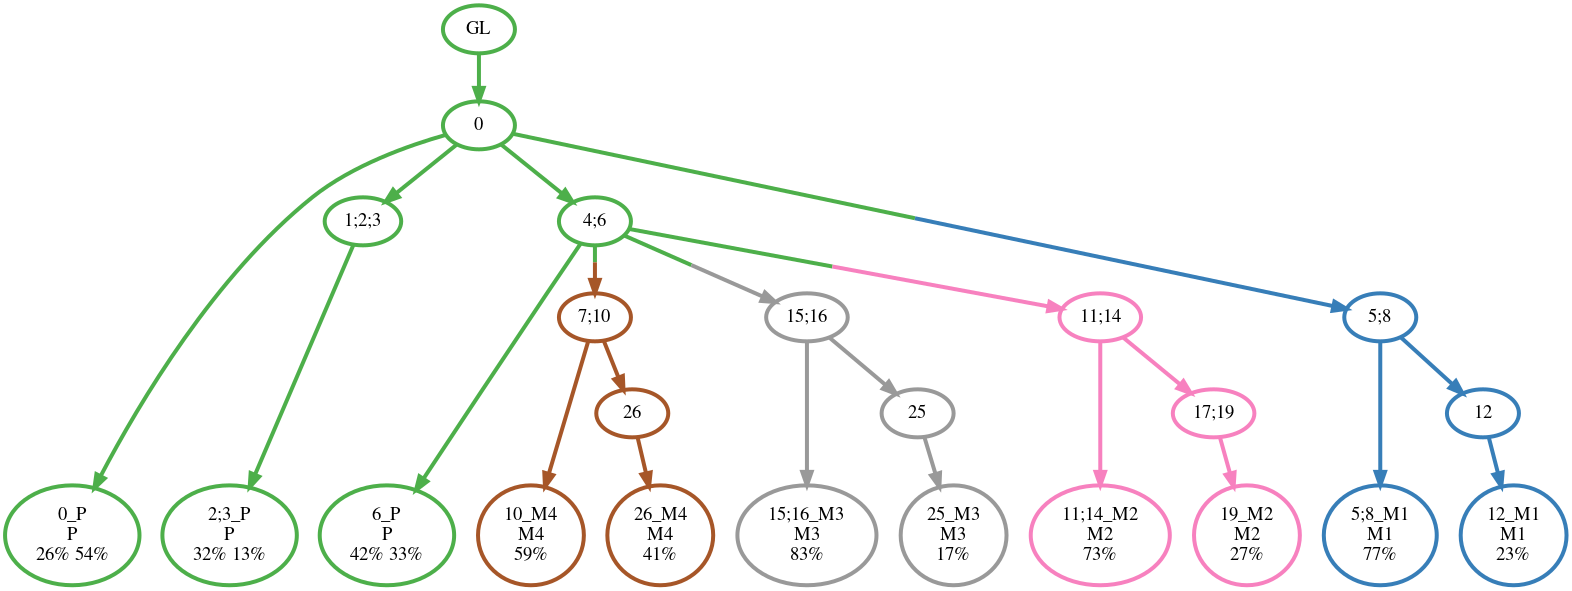

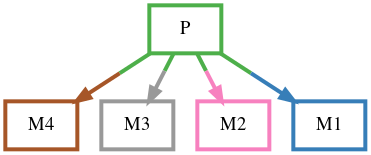

In [9]:
num_sites = "m5"
mig_type = "mS"
seed = 12
# num_sites = "m5"
# mig_type = "M"
# seed = 694
# num_sites = "m5"
# mig_type = "S"
# seed = 31
og_sims_dir = "/data/morrisq/divyak/projects/machina/data/sims"
SIM_DATA_DIR = os.path.join(og_sims_dir, num_sites, mig_type)

print("Ground truth")
visualize_ground_truth(os.path.join(SIM_DATA_DIR, f"T_seed{seed}.dot"), os.path.join(SIM_DATA_DIR, f"G_seed{seed}.dot"))



In [10]:
import fnmatch
custom_colors = [matplotlib.colors.to_hex(c) for c in ['limegreen', 'cornflowerblue', 'hotpink', 'grey', 'saddlebrown', 'darkorange', 'purple', 'red', 'black', 'black', 'black', 'black']]
def find_labelings_all_mutation_trees(site, cluster_fn, all_mut_trees_fn, ref_var_fn):
    weights = Weights(mig=[10], comig=5, seed_site=1,gen_dist=0.1)
    
    trees = fnmatch.filter(os.listdir(os.path.join(MACHINA_DATA_DIR, f"{site}_clustered_input_corrected")), f"cluster_{mig_type}_seed{seed}_tree*.tsv")

    idx_to_cluster_label = get_idx_to_cluster_label(cluster_fn, ignore_polytomies=True)
    data = get_adj_matrices_from_spruce_mutation_trees(all_mut_trees_fn, idx_to_cluster_label, is_sim_data=True)
    custom_colors = [matplotlib.colors.to_hex(c) for c in ['limegreen', 'royalblue', 'hotpink', 'grey', 'saddlebrown', 'darkorange', 'purple', 'red', 'black', 'black', 'black', 'black']]
    perf_stats = []
    print("Number of trees:", len(trees))
    for tree_num in range(len(trees)):

        ref_var_fn = os.path.join(MACHINA_DATA_DIR, f"{site}_clustered_input_corrected", f"cluster_{mig_type}_seed{seed}_tree{tree_num}.tsv")
        idx_to_cluster_label = dutil.get_index_to_cluster_label_from_corrected_sim_tsv(ref_var_fn)
        data = dutil.get_adj_matrices_from_spruce_mutation_trees(all_mut_trees_fn, idx_to_cluster_label, is_sim_data=True)
        assert(data[tree_num][1] == idx_to_cluster_label)
        T = torch.tensor(data[tree_num][0], dtype = torch.float32)
        print_config = PrintConfig(visualize=True, verbose=False, k_best_trees=10, save_outputs=False)

        T_edges, labeling, G_edges, loss_info, time = vert.get_migration_history(T, ref_var_fn, 'P', weights, print_config, "./", f"tree{tree_num}_seed{seed}", 
                                                                            max_iter=100, batch_size=256, custom_colors=custom_colors, 
                                                                            bias_weights=True, mode='evaluate', solve_polytomies=False)

        

Number of trees: 2


/lila/data/morrisq/divyak/projects/metient/metient/util/vertex_labeling_util.py:307: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(get_path_matrix(A.T, remove_self_loops=False), dtype = torch.float32)


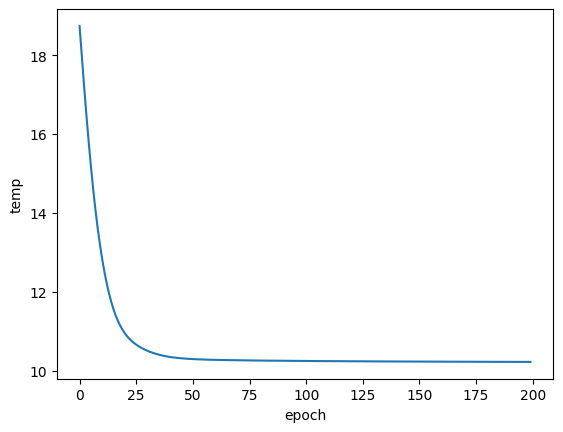

  0%|          | 0/100 [00:00<?, ?it/s]/lila/data/morrisq/divyak/projects/metient/metient/util/vertex_labeling_util.py:298: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(get_path_matrix(A, remove_self_loops=True), dtype = torch.float32)
  1%|          | 1/100 [00:00<00:13,  7.14it/s]

U
     GL     0   1;2   4;6   5;8  7;10    12  11;14  15;16  17;19    25    26
P    0 0.307 0.254 0.425 0.000 0.000 0.000  0.000  0.000  0.000 0.000 0.000
M1   0 0.000 0.000 0.000 0.799 0.000 0.190  0.000  0.000  0.000 0.000 0.000
M2   0 0.000 0.000 0.101 0.000 0.000 0.000  0.603  0.000  0.288 0.000 0.000
M3   0 0.000 0.000 0.000 0.000 0.000 0.000  0.000  0.838  0.000 0.155 0.000
M4   0 0.000 0.000 0.000 0.000 0.638 0.000  0.000  0.000  0.000 0.000 0.310
F
        0   1;2   4;6   5;8  7;10    12  11;14  15;16  17;19    25    26
P  0.499 0.127 0.213 0.000 0.000 0.000  0.000  0.000  0.000 0.000 0.000
M1 0.527 0.000 0.000 0.510 0.000 0.096  0.000  0.000  0.000 0.000 0.000
M2 0.510 0.000 0.509 0.000 0.000 0.000  0.446  0.000  0.145 0.000 0.000
M3 0.505 0.000 0.491 0.000 0.000 0.000  0.000  0.514  0.000 0.080 0.000
M4 0.498 0.000 0.495 0.000 0.474 0.000  0.000  0.000  0.000 0.000 0.157
F hat
        0   1;2   4;6   5;8  7;10    12  11;14  15;16  17;19    25    26
P  0.988 0.254 0.427 0.001 

100%|██████████| 100/100 [00:00<00:00, 107.39it/s]


{'not primary single-source seeding': 12, 'primary single-source seeding': 10}
# final solutions: 1


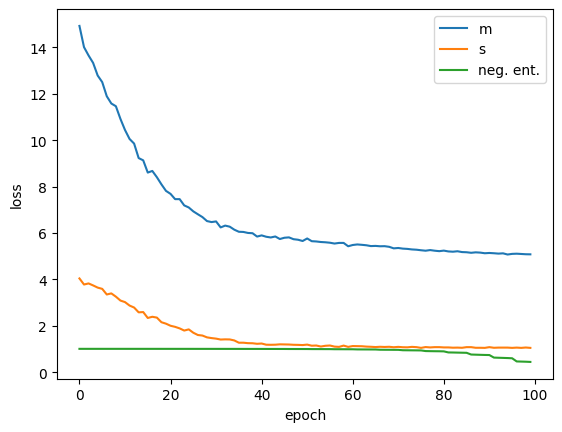

tree0_seed12
10 unique trees were not found (1 was found). Retry with a higher sample size if you want to get more trees.


<Figure size 640x480 with 0 Axes>

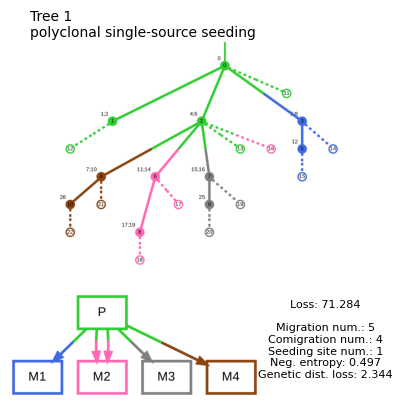

/lila/data/morrisq/divyak/projects/metient/metient/util/vertex_labeling_util.py:307: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(get_path_matrix(A.T, remove_self_loops=False), dtype = torch.float32)


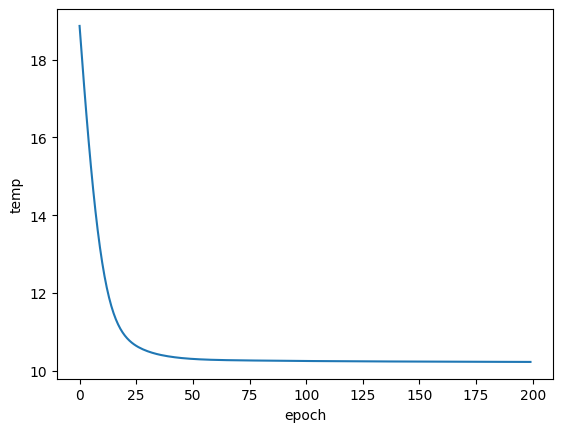

  0%|          | 0/100 [00:00<?, ?it/s]/lila/data/morrisq/divyak/projects/metient/metient/util/vertex_labeling_util.py:298: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(get_path_matrix(A, remove_self_loops=True), dtype = torch.float32)
 11%|█         | 11/100 [00:00<00:00, 107.30it/s]

U
     GL     0   1;2   4;6   5;8  7;10    12  11;14  15;16  17;19    25    26
P    0 0.560 0.254 0.171 0.000 0.000 0.000  0.000  0.000  0.000 0.000 0.000
M1   0 0.000 0.000 0.000 0.803 0.000 0.187  0.000  0.000  0.000 0.000 0.000
M2   0 0.000 0.000 0.100 0.000 0.000 0.000  0.603  0.000  0.288 0.000 0.000
M3   0 0.000 0.000 0.000 0.000 0.000 0.000  0.000  0.834  0.000 0.157 0.000
M4   0 0.000 0.000 0.000 0.000 0.660 0.000  0.000  0.000  0.000 0.000 0.312
F
        0   1;2   4;6   5;8  7;10    12  11;14  15;16  17;19    25    26
P  0.499 0.127 0.213 0.000 0.000 0.000  0.000  0.000  0.000 0.000 0.000
M1 0.527 0.000 0.000 0.510 0.000 0.096  0.000  0.000  0.000 0.000 0.000
M2 0.510 0.000 0.509 0.000 0.000 0.000  0.446  0.000  0.145 0.000 0.000
M3 0.505 0.000 0.491 0.000 0.000 0.000  0.000  0.514  0.000 0.080 0.000
M4 0.498 0.000 0.495 0.000 0.474 0.000  0.000  0.000  0.000 0.000 0.157
F hat
        0   1;2   4;6   5;8  7;10    12  11;14  15;16  17;19    25    26
P  0.987 0.254 0.427 0.000 

100%|██████████| 100/100 [00:00<00:00, 137.27it/s]


{'not primary single-source seeding': 13, 'primary single-source seeding': 10}
# final solutions: 1


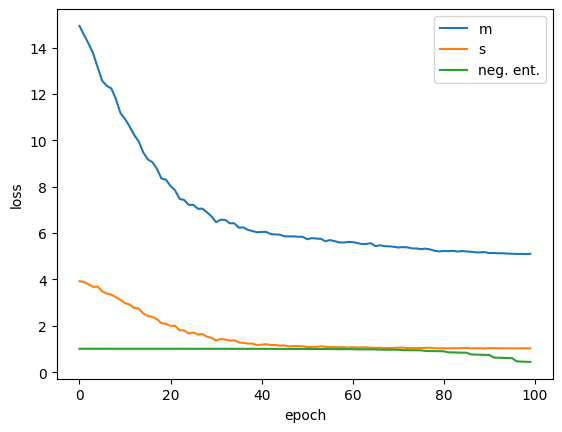

tree1_seed12
10 unique trees were not found (1 was found). Retry with a higher sample size if you want to get more trees.


<Figure size 640x480 with 0 Axes>

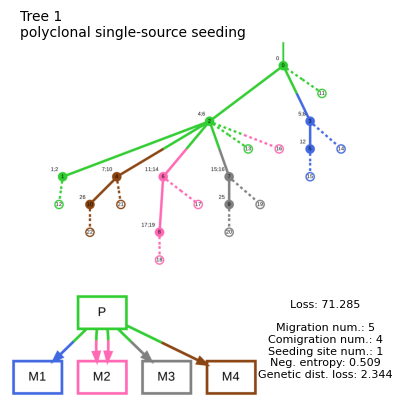

In [11]:
# %%prun
find_labelings_all_mutation_trees(num_sites, os.path.join(MACHINA_DATA_DIR, f"{num_sites}_clustered_input", f"cluster_{mig_type}_seed{seed}.txt"),
                                  os.path.join(MACHINA_DATA_DIR, f"{num_sites}_mut_trees", f"mut_trees_{mig_type}_seed{seed}.txt"),
                                  os.path.join(MACHINA_DATA_DIR, f"{num_sites}_clustered_input", f"cluster_{mig_type}_seed{seed}.tsv"))